In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

In [2]:
funda = pd.read_csv("funda-amsterdam.csv", encoding="utf-8")

In [3]:
funda_corr = funda[funda["price"] > 100000]

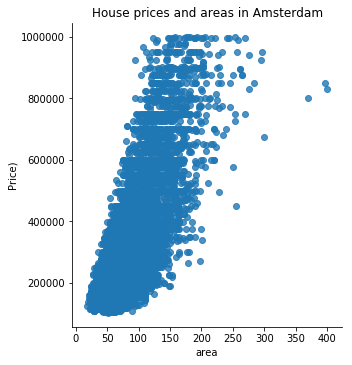

In [4]:
# plot price and surface area, both with and without a regression line.
#plot without regression
sns.lmplot(x='area', y='price', fit_reg=False, data=funda_corr) #fit_reg=False leaves out the regression line; see below
plt.xlabel('area') #use matplotlib to refine Seaborn plot
plt.ylabel('Price)')
plt.title('House prices and areas in Amsterdam')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


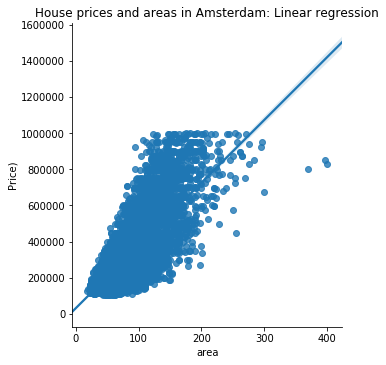

In [23]:
#plot with regression line
sns.lmplot(x='area', y='price', fit_reg=True, data=funda_corr) #fit_reg=True adds the regression line
plt.xlabel('area') #use matplotlib to refine Seaborn plot
plt.ylabel('Price)')
plt.title('House prices and areas in Amsterdam: Linear regression')
plt.show()

In [6]:
#Train a linear model using sk-lear
#first create lists of the two variables
# Note that you need to use [[]] with x, because x could be multiple variables (each variable is a list)
x = funda_corr[['area']] 
y = funda_corr['price']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

#remember rhat b0 is the intercept and b1 is the slope

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 30486.17 + 3478.49X


The linear regression formula is 
$y= 3478.49 + 30486.17x$

In [7]:
funda_corr['price_p'] = lm.predict(x) #using built-in predict() method to generate predictions; store in original dataframe
#predicat price from the whole data frame
funda_corr.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,406163.211993
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,193975.255634
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,433991.140695
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,232238.657600
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,249631.113039
5,5,Bertrand Russellstraat 46,125,2,1097 HL,20-5-2016,515000,apartment,3,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1991,465297.560486
6,6,Admiraal De Ruijterweg 417 I,64,3,1055 ME,14-6-2016,200000,apartment,4,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,253109.604127
7,7,Deltastraat 10 -boven,155,3,1078 PC,24-5-2016,599000,apartment,5,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,569652.293122
8,8,Ben van Meerendonkstraat 49,85,2,1087 LB,21-5-2016,249000,apartment,3,10-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2007,326157.916972
9,9,Jacob van Lennepstraat 263 B,67,2,1053 JE,13-5-2016,300000,apartment,3,27-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1900,263545.077391


In [8]:
#price price for 70 square meter
price_predict = lm.predict(70)
price_predict
print (f"The predicted price for a 70 m2 house is {price_predict[0]}")

The predicted price for a 70 m2 house is 273980.55065437267


In [20]:
#What is the prediction for Slichtenhorststraat 10? What is the residual?
funda_corr["residual"] = funda_corr["price_p"] - funda_corr["price"]
funda_corr.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p,residual
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,406163.211993,-103836.788007
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,193975.255634,-21024.744366
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,433991.140695,108991.140695
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,232238.657600,-82761.342400
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,249631.113039,49631.113039


In [10]:
#to get the address in the dataframe
#can iloc also be used?
funda_corr[funda_corr["address"]== 'Slichtenhorststraat 10'].head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p,residual
21,21,Slichtenhorststraat 10,114,3,1107 VH,18-9-2015,234500,house,4,3-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1983,427034.15852,-192534.15852


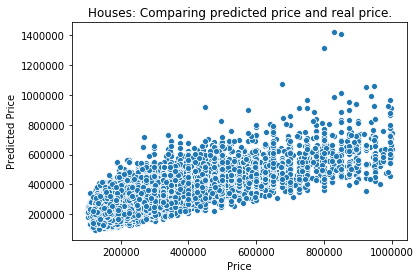

In [21]:
#Make the following plots:
#A scatter plot of (Y, Y’) (Y’ means predicted Y)
#remember the first value is on the x-axis
sns.scatterplot(x='price', y='price_p', data=funda_corr) 
plt.xlabel('Price') 
plt.ylabel('Predicted Price')
plt.title('Houses: Comparing predicted price and real price.')
plt.show()

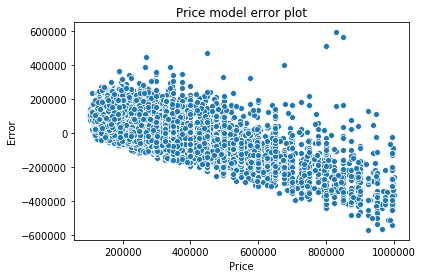

In [22]:
#looking at how the real values and predicted values relate to each other
#A scatter plot of (X, e)
sns.scatterplot(x='price', y='residual', data=funda_corr) #fit_reg=True adds the regression line
plt.xlabel('Price') #use matplotlib to refine Seaborn plot
plt.ylabel('Error')
plt.title('Price model error plot')
plt.show()
#to help interpret the relationshsip, pick one data point and look at how it 'travels' through the different graphs/formulas

In [16]:
#What is the R2 of the model?
r2 = r2_score(funda_corr["price"], funda_corr["price_p"])
r2

0.5223623958256581

In [19]:
#What is the root mean squared error (RMSE)?
math.sqrt(mean_squared_error(funda_corr["price"], funda_corr["price_p"]))

118085.87896820484

The R^2 is 52% which means over half of the variantion in the price is explained in the model (using the area of the property. The RSME however, shows that the predicted house prices are, on average, off by almost 120,000 euros. In addition, the price model error plot demonstrates that cheaper houses fit the model much better than more expensive houses. The predictive trend in the model is that cheaper houses are predicted to be more expensive, and expensive houses are predicted as cheaper.